In [1]:
import os
os.chdir('..')

In [2]:
%pwd

'c:\\Users\\anasm\\OneDrive\\Desktop\\Image Processing\\Hand Gesture Detector'

In [3]:
from src.constants import CONFIG_FILE_PATH, PARAM_FILE_PATH
from src.utils import read_yaml, create_directories

In [4]:
#to entity
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen= True)
class PreprocessConfig:
    data_path: Path
    preprocessed_data_dir: Path
    image_tensor_path: Path
    labels_path: Path
    image_size: list
    classes: int

In [5]:
#to configuration
class ConfigManager:
    def __init__(
        self,
        config=CONFIG_FILE_PATH,
        params=PARAM_FILE_PATH):

        self.config=read_yaml(config)
        self.params=read_yaml(params)

    def get_preprocess_config(self)->PreprocessConfig:
        create_directories(self.config.preprocess_data.preprocessed_data_dir)

        PreprocessConfigObj=PreprocessConfig(
            data_path= self.config.data_root,
            preprocessed_data_dir= self.config.preprocess_data.preprocessed_data_dir,
            image_tensor_path=self.config.preprocess_data.image_tensors_path,
            labels_path= self.config.preprocess_data.labels_path,
            image_size= self.params.IMAGE_SIZE,
            classes= self.params.CLASSES
        )

        return PreprocessConfigObj

In [6]:
#to components
import pickle
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input

class Preprocess:
    def __init__(self, config:PreprocessConfig) -> None:
        self.config=config
        self.images=[]
        self.labels=[]

    '''
    call me:0
    fingers crossed:1
    okay:2
    paper:3
    peace: 4
    rock: 5
    rock_on: 6
    scissor: 7
    thumns: 8
    up:9
    '''
    
    def process(self):
        i=0
        for folder in os.listdir(self.config.data_path):
            folder_path=os.path.join(self.config.data_path, folder)

            for filename in os.listdir(folder_path):
                lst=[]
                for j in range(self.config.classes):
                    lst.append(0)

                lst[i]=1
                self.labels.append(lst)

                img=cv2.imread(str(os.path.join(folder_path, filename)), 1)
                img=cv2.resize(img, (self.config.image_size[0], self.config.image_size[1]))
                self.images.append(img)
            
            i+=1
        
        self.images=np.array(self.images, dtype=np.float32)
        self.labels=np.array(self.labels, dtype=np.uint8)

        self.images=preprocess_input(self.images)

        with open(Path(self.config.image_tensor_path), 'wb') as file:
            pickle.dump(self.images, file)
        
        with open(Path(self.config.labels_path), 'wb') as file:
            pickle.dump(self.labels, file)


In [7]:
c=ConfigManager()
preprocess_config=c.get_preprocess_config()

yaml file: C:\Users\anasm\OneDrive\Desktop\Image Processing\Hand Gesture Detector\config\config.yaml loaded successfully
yaml file: C:\Users\anasm\OneDrive\Desktop\Image Processing\Hand Gesture Detector\config\params.yaml loaded successfully


In [8]:
p=Preprocess(preprocess_config)

In [9]:
p.config.data_path

'data'

In [10]:
p.process()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


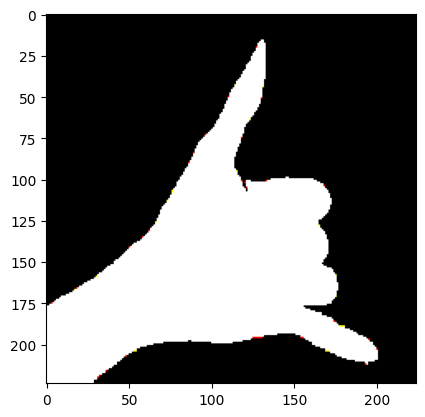

In [11]:
import matplotlib.pyplot as plt
plt.imshow(p.images[0])

In [12]:
print(p.labels[0])

[1 0 0 0 0 0 0 0 0 0]


In [15]:
p.images.shape

(5243, 224, 224, 3)

In [16]:
p.labels.shape

(5243, 10)